In [ ]:
!pip install pandas datasets


In [ ]:
!pip install openai==0.28

In [5]:
import openai
from datasets import load_dataset
from sklearn.metrics import classification_report


# Load the test dataset
dataset = load_dataset("Gear12312/Toxic-Chat-V2", split="test")

# Ground truth labels and predictions
true_labels = []
predicted_labels = []

# Define a function to use the OpenAI Moderation API
def check_toxicity(input_text):
    try:
        response = openai.Moderation.create(input=input_text)
        return response["results"][0]["flagged"]
    except Exception as e:
        print(f"API error: {e}")
        return False

# Evaluate the dataset
for example in dataset:
    prompt = example["input"]
    true_label = example["toxic"]  # Ground truth (1 for toxic, 0 for non-toxic)

    # Get the OpenAI Moderation API prediction
    flagged = check_toxicity(prompt)
    predicted_label = int(flagged)  # Convert Boolean to integer (1 for toxic, 0 for non-toxic)

    # Store results
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

# Evaluate performance
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=["Non-Toxic", "Toxic"]))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/627 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/4.90M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/615k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/631k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8132 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1016 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1017 [00:00<?, ? examples/s]

Classification Report:
              precision    recall  f1-score   support

   Non-Toxic       0.94      1.00      0.97       939
       Toxic       0.95      0.27      0.42        78

    accuracy                           0.94      1017
   macro avg       0.95      0.63      0.70      1017
weighted avg       0.94      0.94      0.93      1017



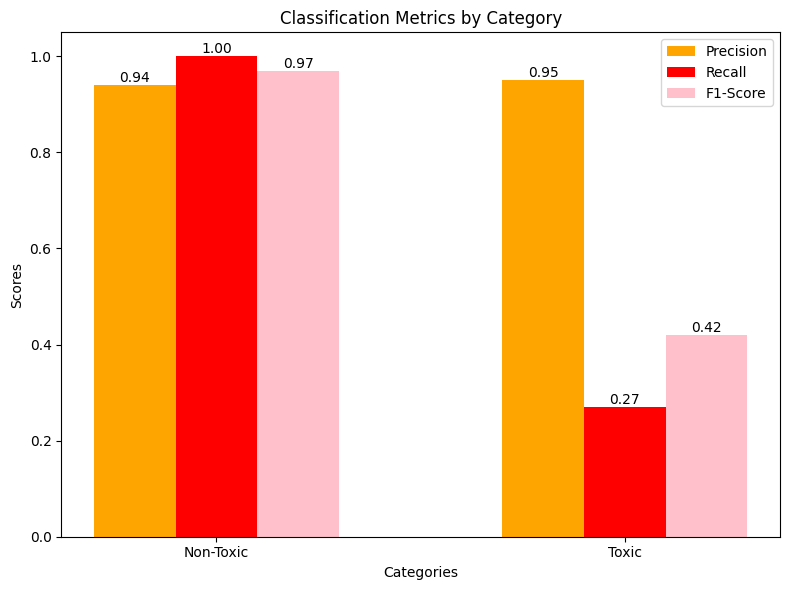

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the classification report
categories = ["Non-Toxic", "Toxic"]
precision = [0.94, 0.95]  # Precision scores for each category
recall = [1.00, 0.27]     # Recall scores for each category
f1_score = [0.97, 0.42]   # F1-Score for each category

# Set positions for bars
x = np.arange(len(categories))
width = 0.2

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision', color='orange')
bars2 = ax.bar(x, recall, width, label='Recall', color='red')
bars3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='pink')

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Show the plot
plt.tight_layout()
plt.show()
